In [6]:
#Import packages
import numpy as np
import pickle
import json
import scipy
import spacy
import gensim
import danlp
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import sys

In [7]:
#Subset of data to only include all relevant words (visualize distribution of words used in WEAT replication)

def restrict_wv(wv, restricted_word_set):
    new_vectors = []
    new_vocab = {}
    new_index2entity = []
    new_vectors_norm = []

    for i in range(len(wv.vocab)):
        word = wv.index2entity[i]
        vec = wv.vectors[i]
        vocab = wv.vocab[word]
        vec_norm = wv.vectors_norm[i]
        if word in restricted_word_set:
            vocab.index = len(new_index2entity)
            new_index2entity.append(word)
            new_vocab[word] = vocab
            new_vectors.append(vec)
            new_vectors_norm.append(vec_norm)

    wv.vocab = new_vocab
    wv.vectors = np.array(new_vectors)
    wv.index2entity = np.array(new_index2entity)
    wv.index2word = np.array(new_index2entity)
    wv.vectors_norm = np.array(new_vectors_norm)

In [8]:
#Define t_sne plot
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(n_components=2, perplexity =10)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12, 12), dpi=600) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig('tsne_plot.png')
    plt.show()

In [9]:
#Restrict to all words in the three biases
restricted_word_set = {'mandlig', 'mand','dreng','bror','han','ham','hans','søn','kvindelig', 'kvinde', 'pige', 'søster', 'hun', 'hende', 'hendes', 'datter', 'videnskab', 'teknologi', 'fysik', 'kemi', 'rumfart', 'eksperiment', 'astronomi', 'biologi','matematik', 'algebra', 'geometri', 'regning', 'ligninger', 'beregning', 'tal', 'addition', 'poesi', 'kunst', 'dans', 'litteratur', 'roman', 'symfoni', 'drama', 'skulptur','leder', 'ledelse', 'professionel', 'virksomhed', 'løn', 'kontor', 'forretning', 'karriere', 'hjem','forældre', 'børn', 'familie','bedsteforældre', 'ægteskab', 'bryllup', 'pårørende'}

In [5]:
#Load word embeddings from daNLP
from danlp.models.embeddings  import load_wv_with_gensim, load_wv_with_spacy
embeddings1 = load_wv_with_gensim('wiki.da.wv') #fastText Facebook wiki
#Test embeddings are loaded
embeddings1.most_similar("kvinde")
#Restrict embeddings
restrict_wv(embeddings1, restricted_word_set)

KeyboardInterrupt: 

<ipython-input-16-cefb911590c1>:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  for word in model.wv.vocab:


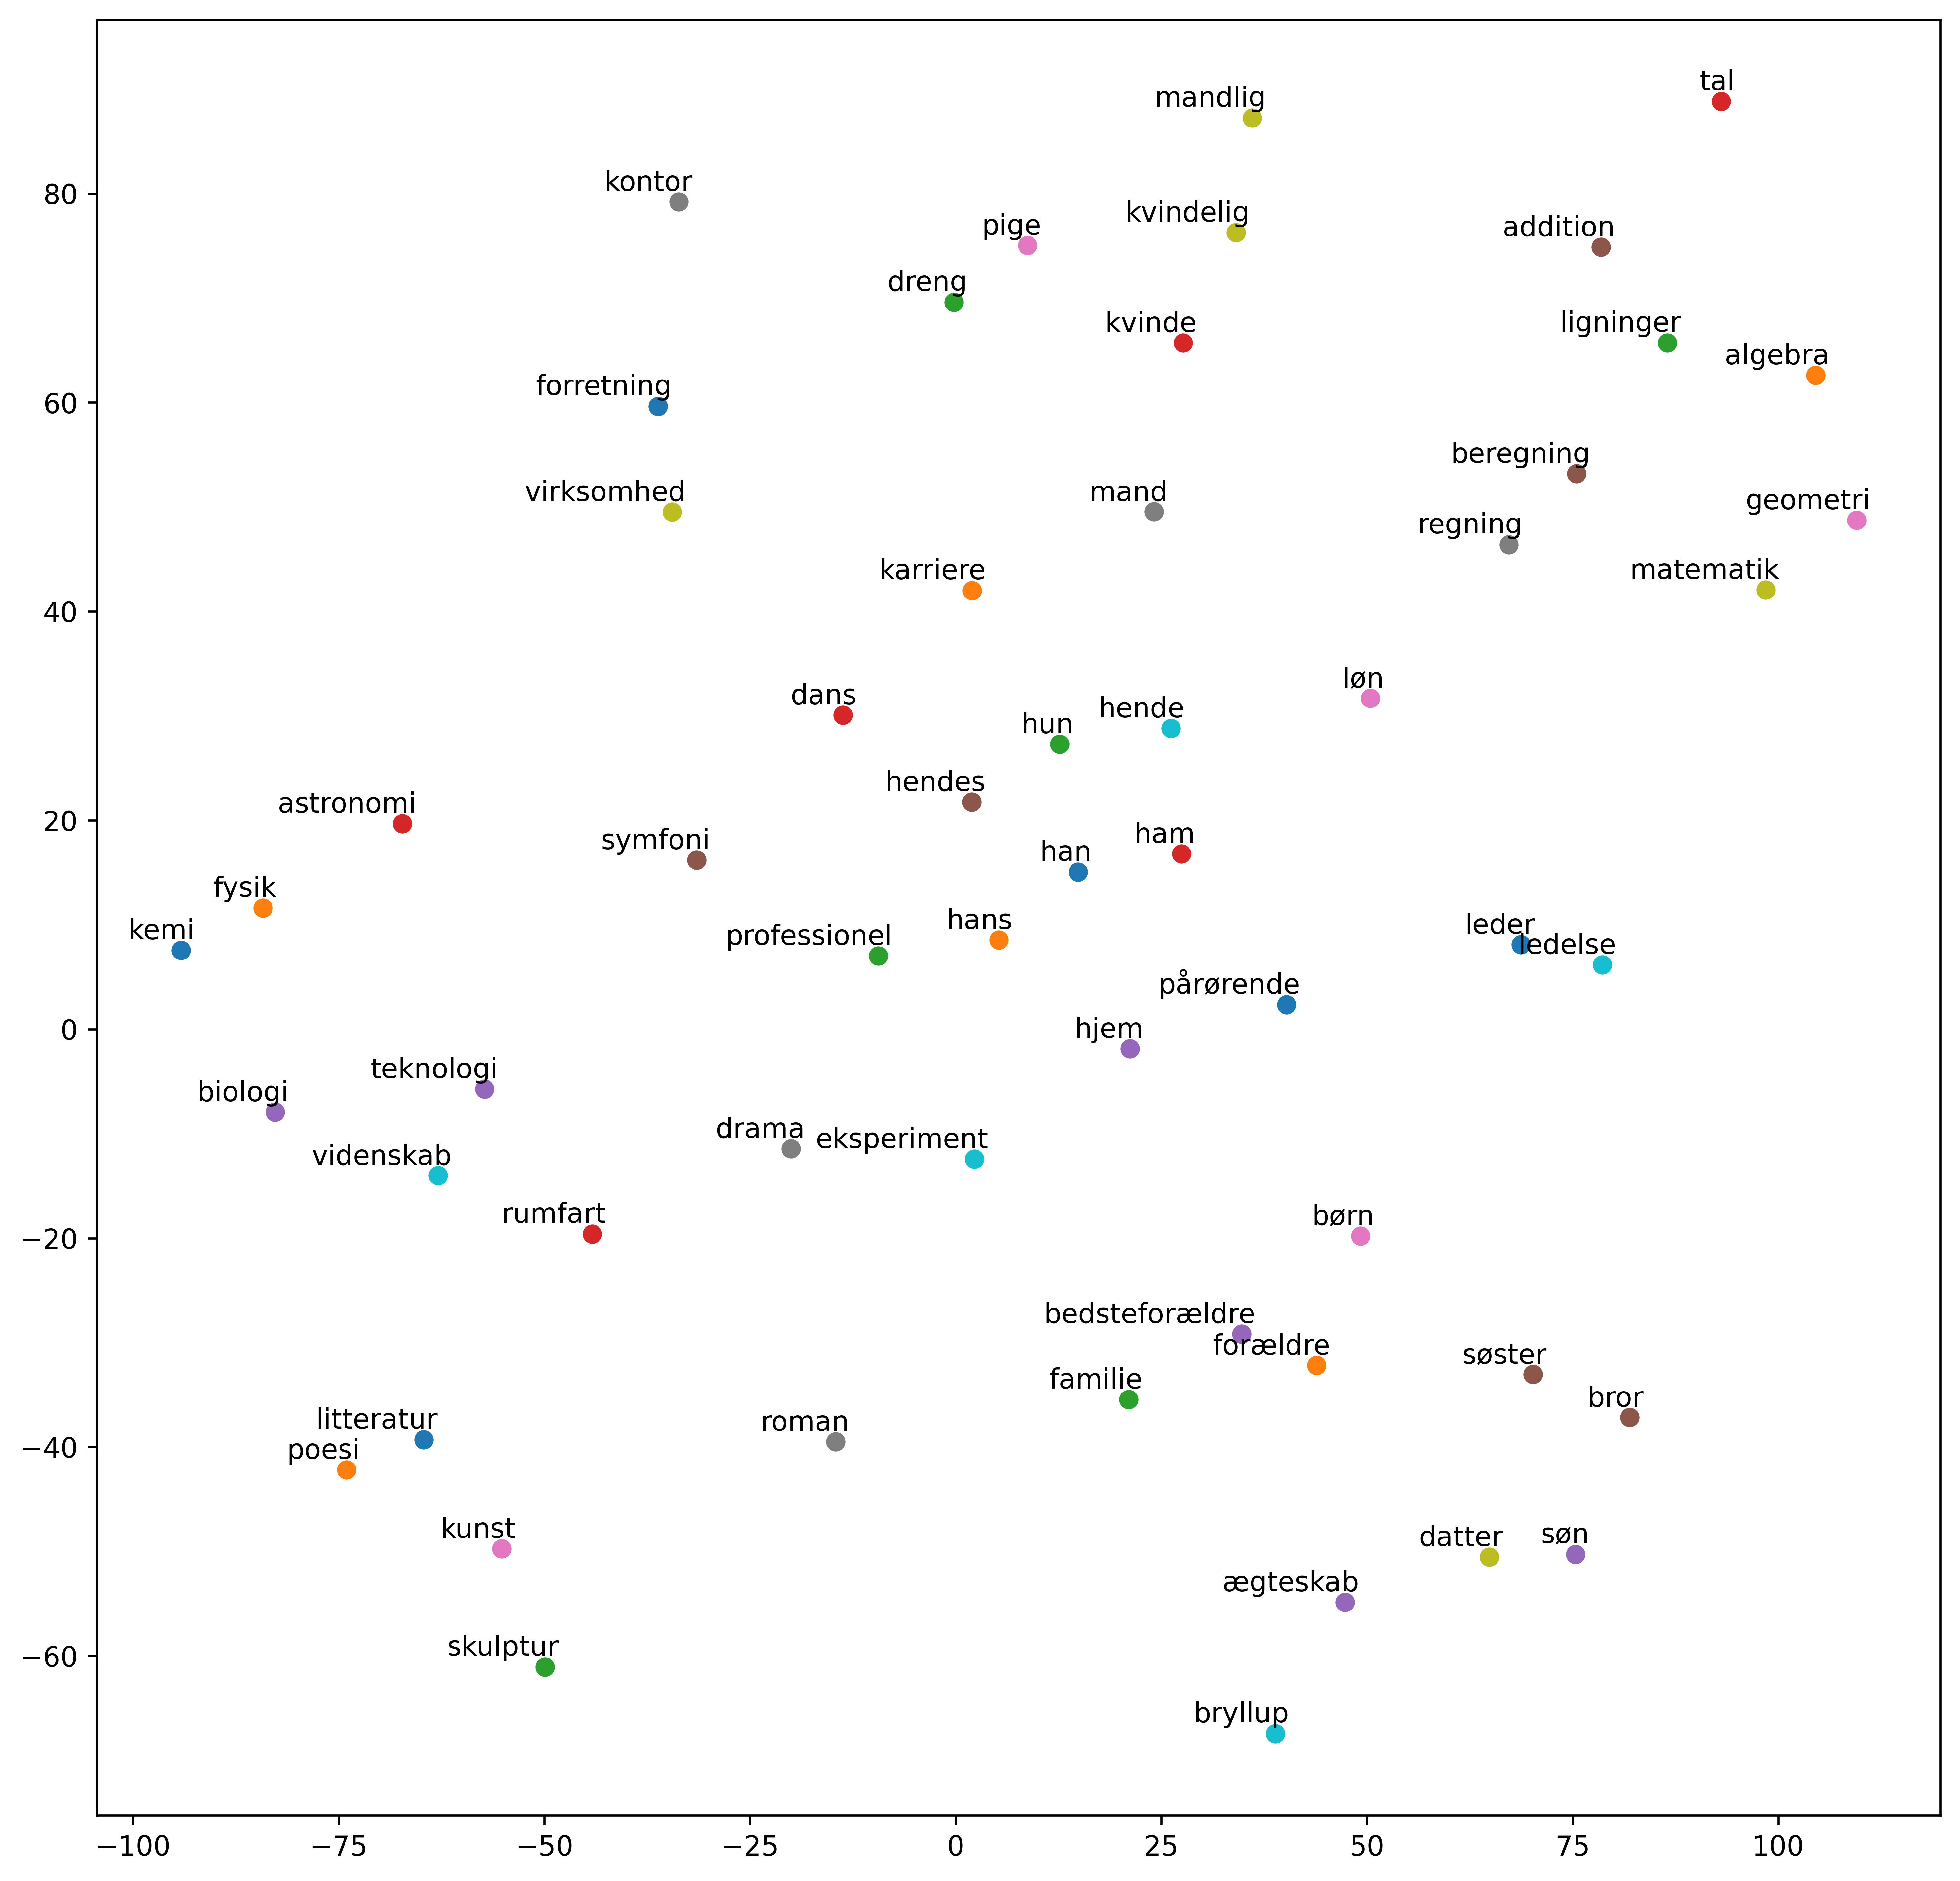

In [19]:
tsne_plot(embeddings1)

In [ ]:
#Run code for all embeddings

<ipython-input-16-cefb911590c1>:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  for word in model.wv.vocab:


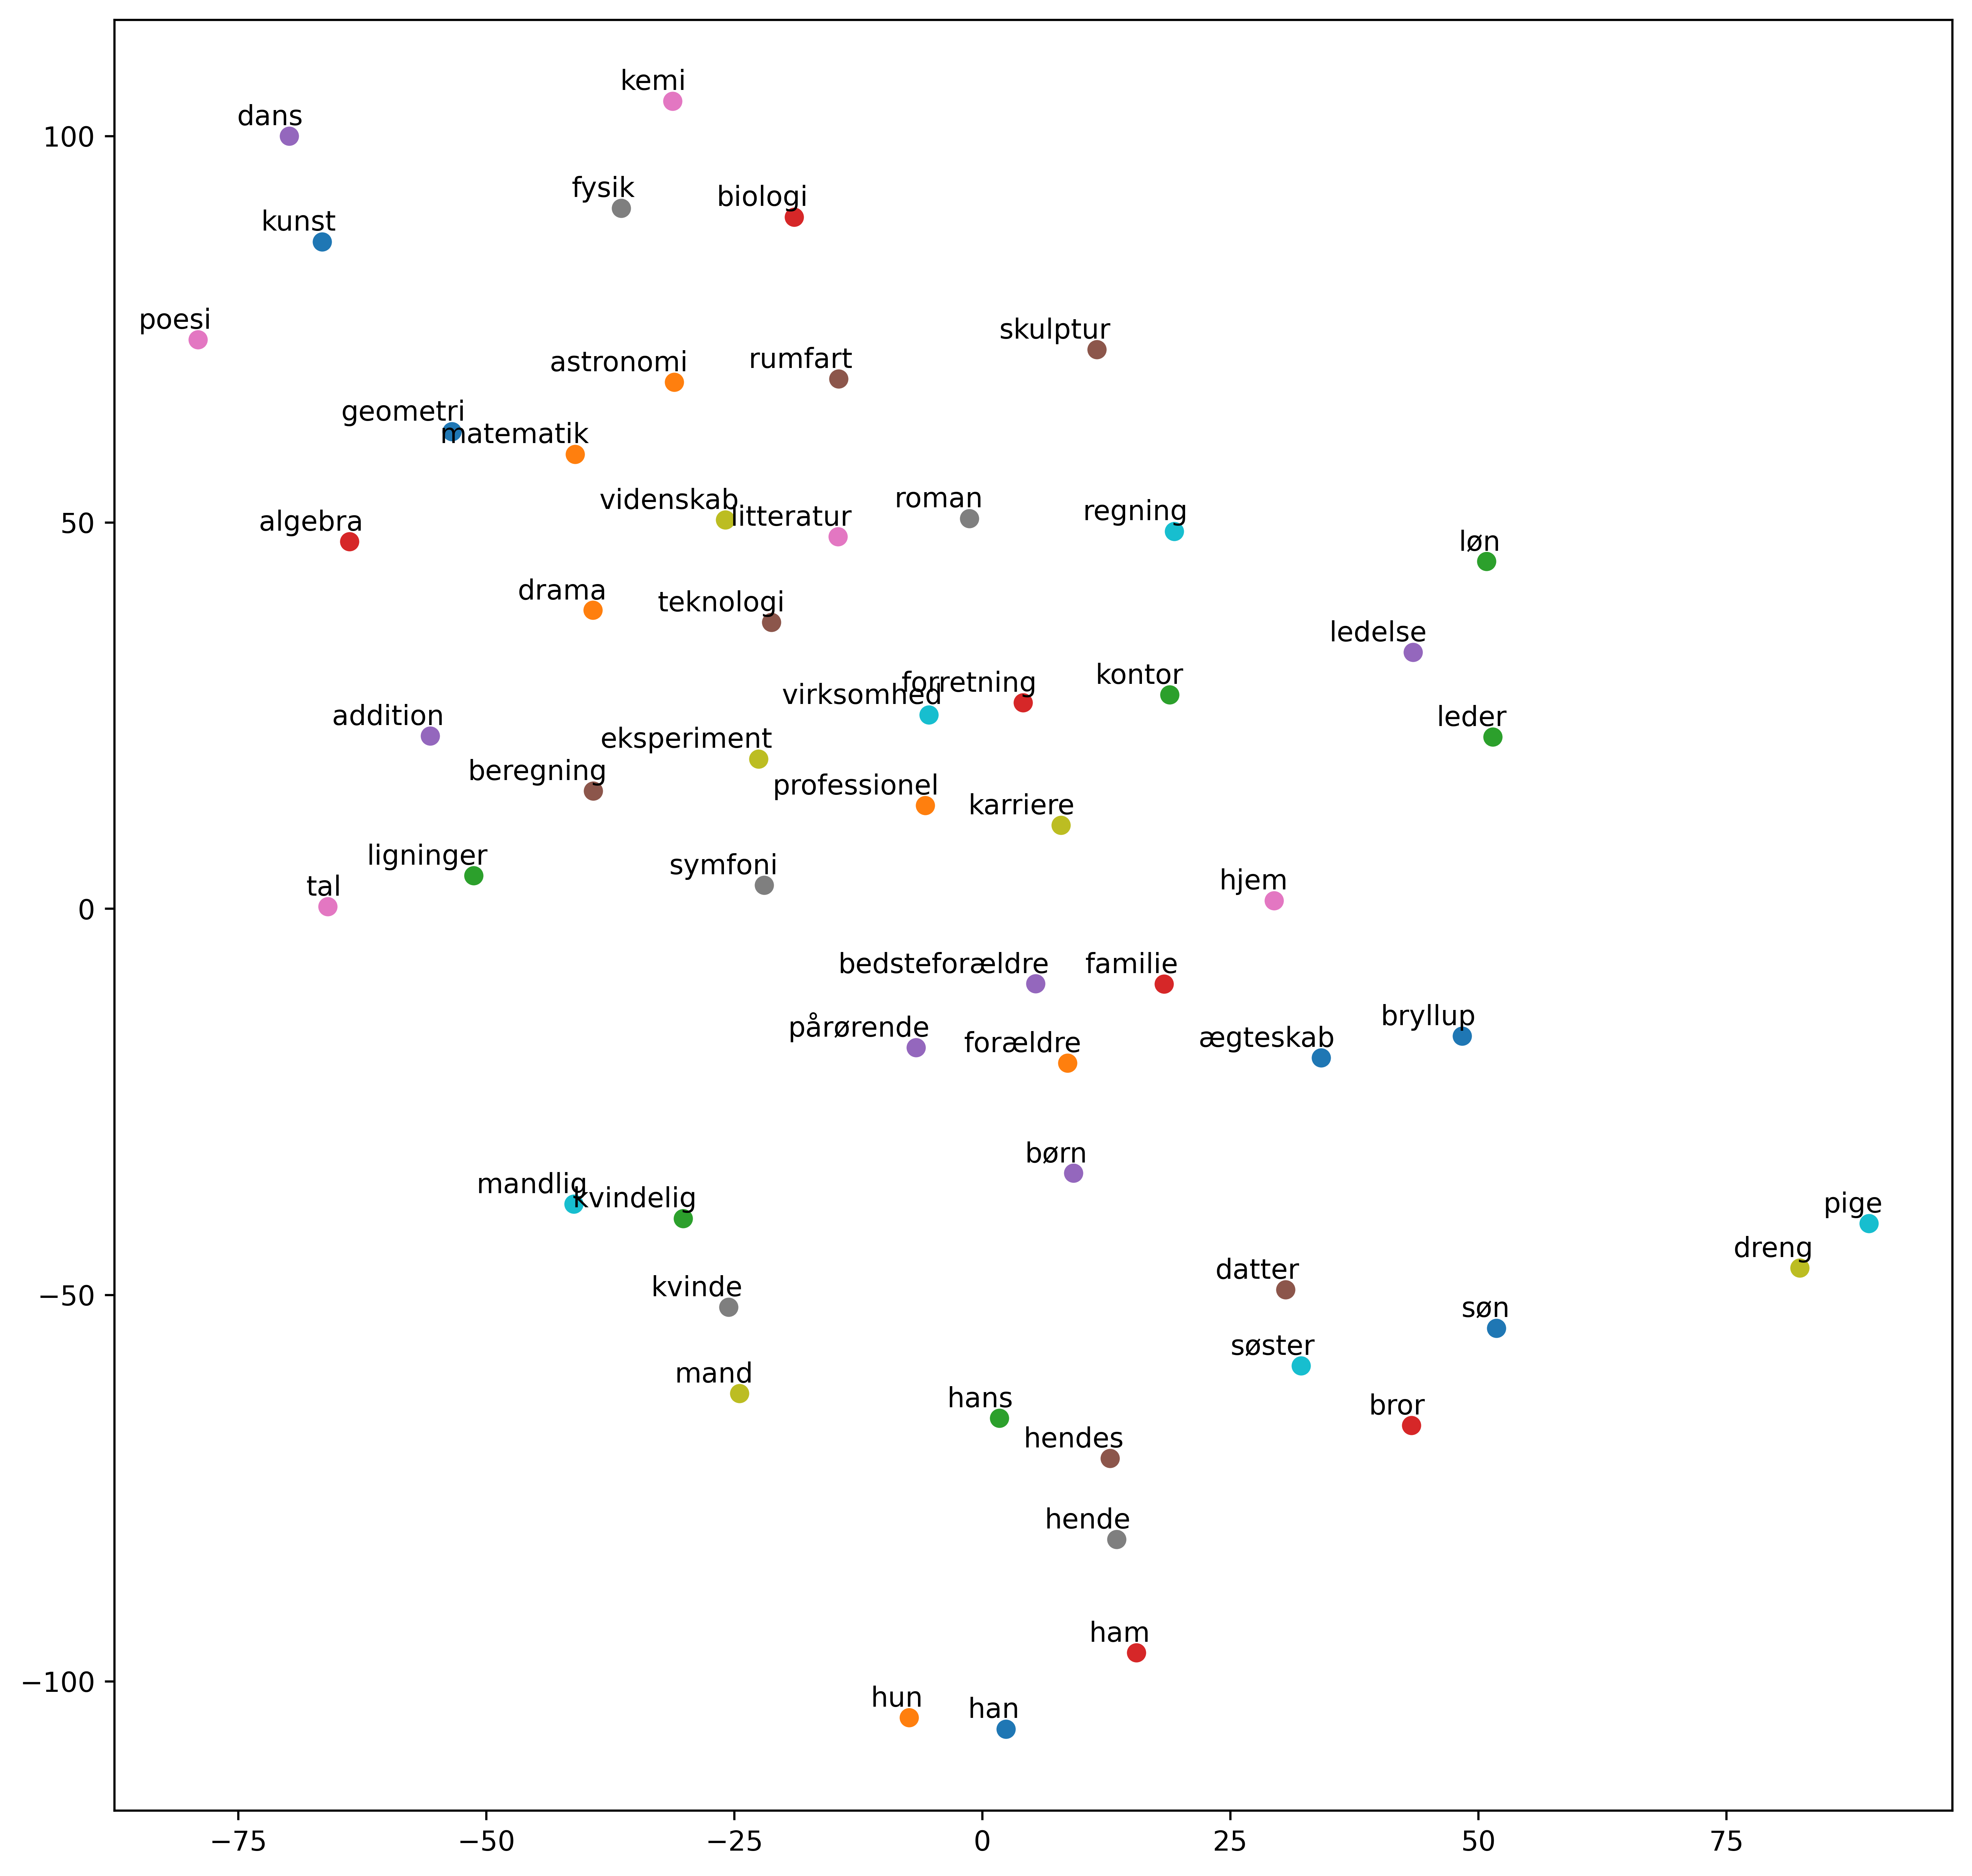

In [20]:
from danlp.models.embeddings  import load_wv_with_gensim, load_wv_with_spacy

#Load word embeddings from daNLP
embeddings2 = load_wv_with_gensim('cc.da.wv') #fastText Facebook wiki + CommonCrawl
#Test embeddings are loaded
embeddings2.most_similar("kvinde")
#Restrict embeddings
restrict_wv(embeddings2, restricted_word_set)
tsne_plot(embeddings2)

<ipython-input-16-cefb911590c1>:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  for word in model.wv.vocab:


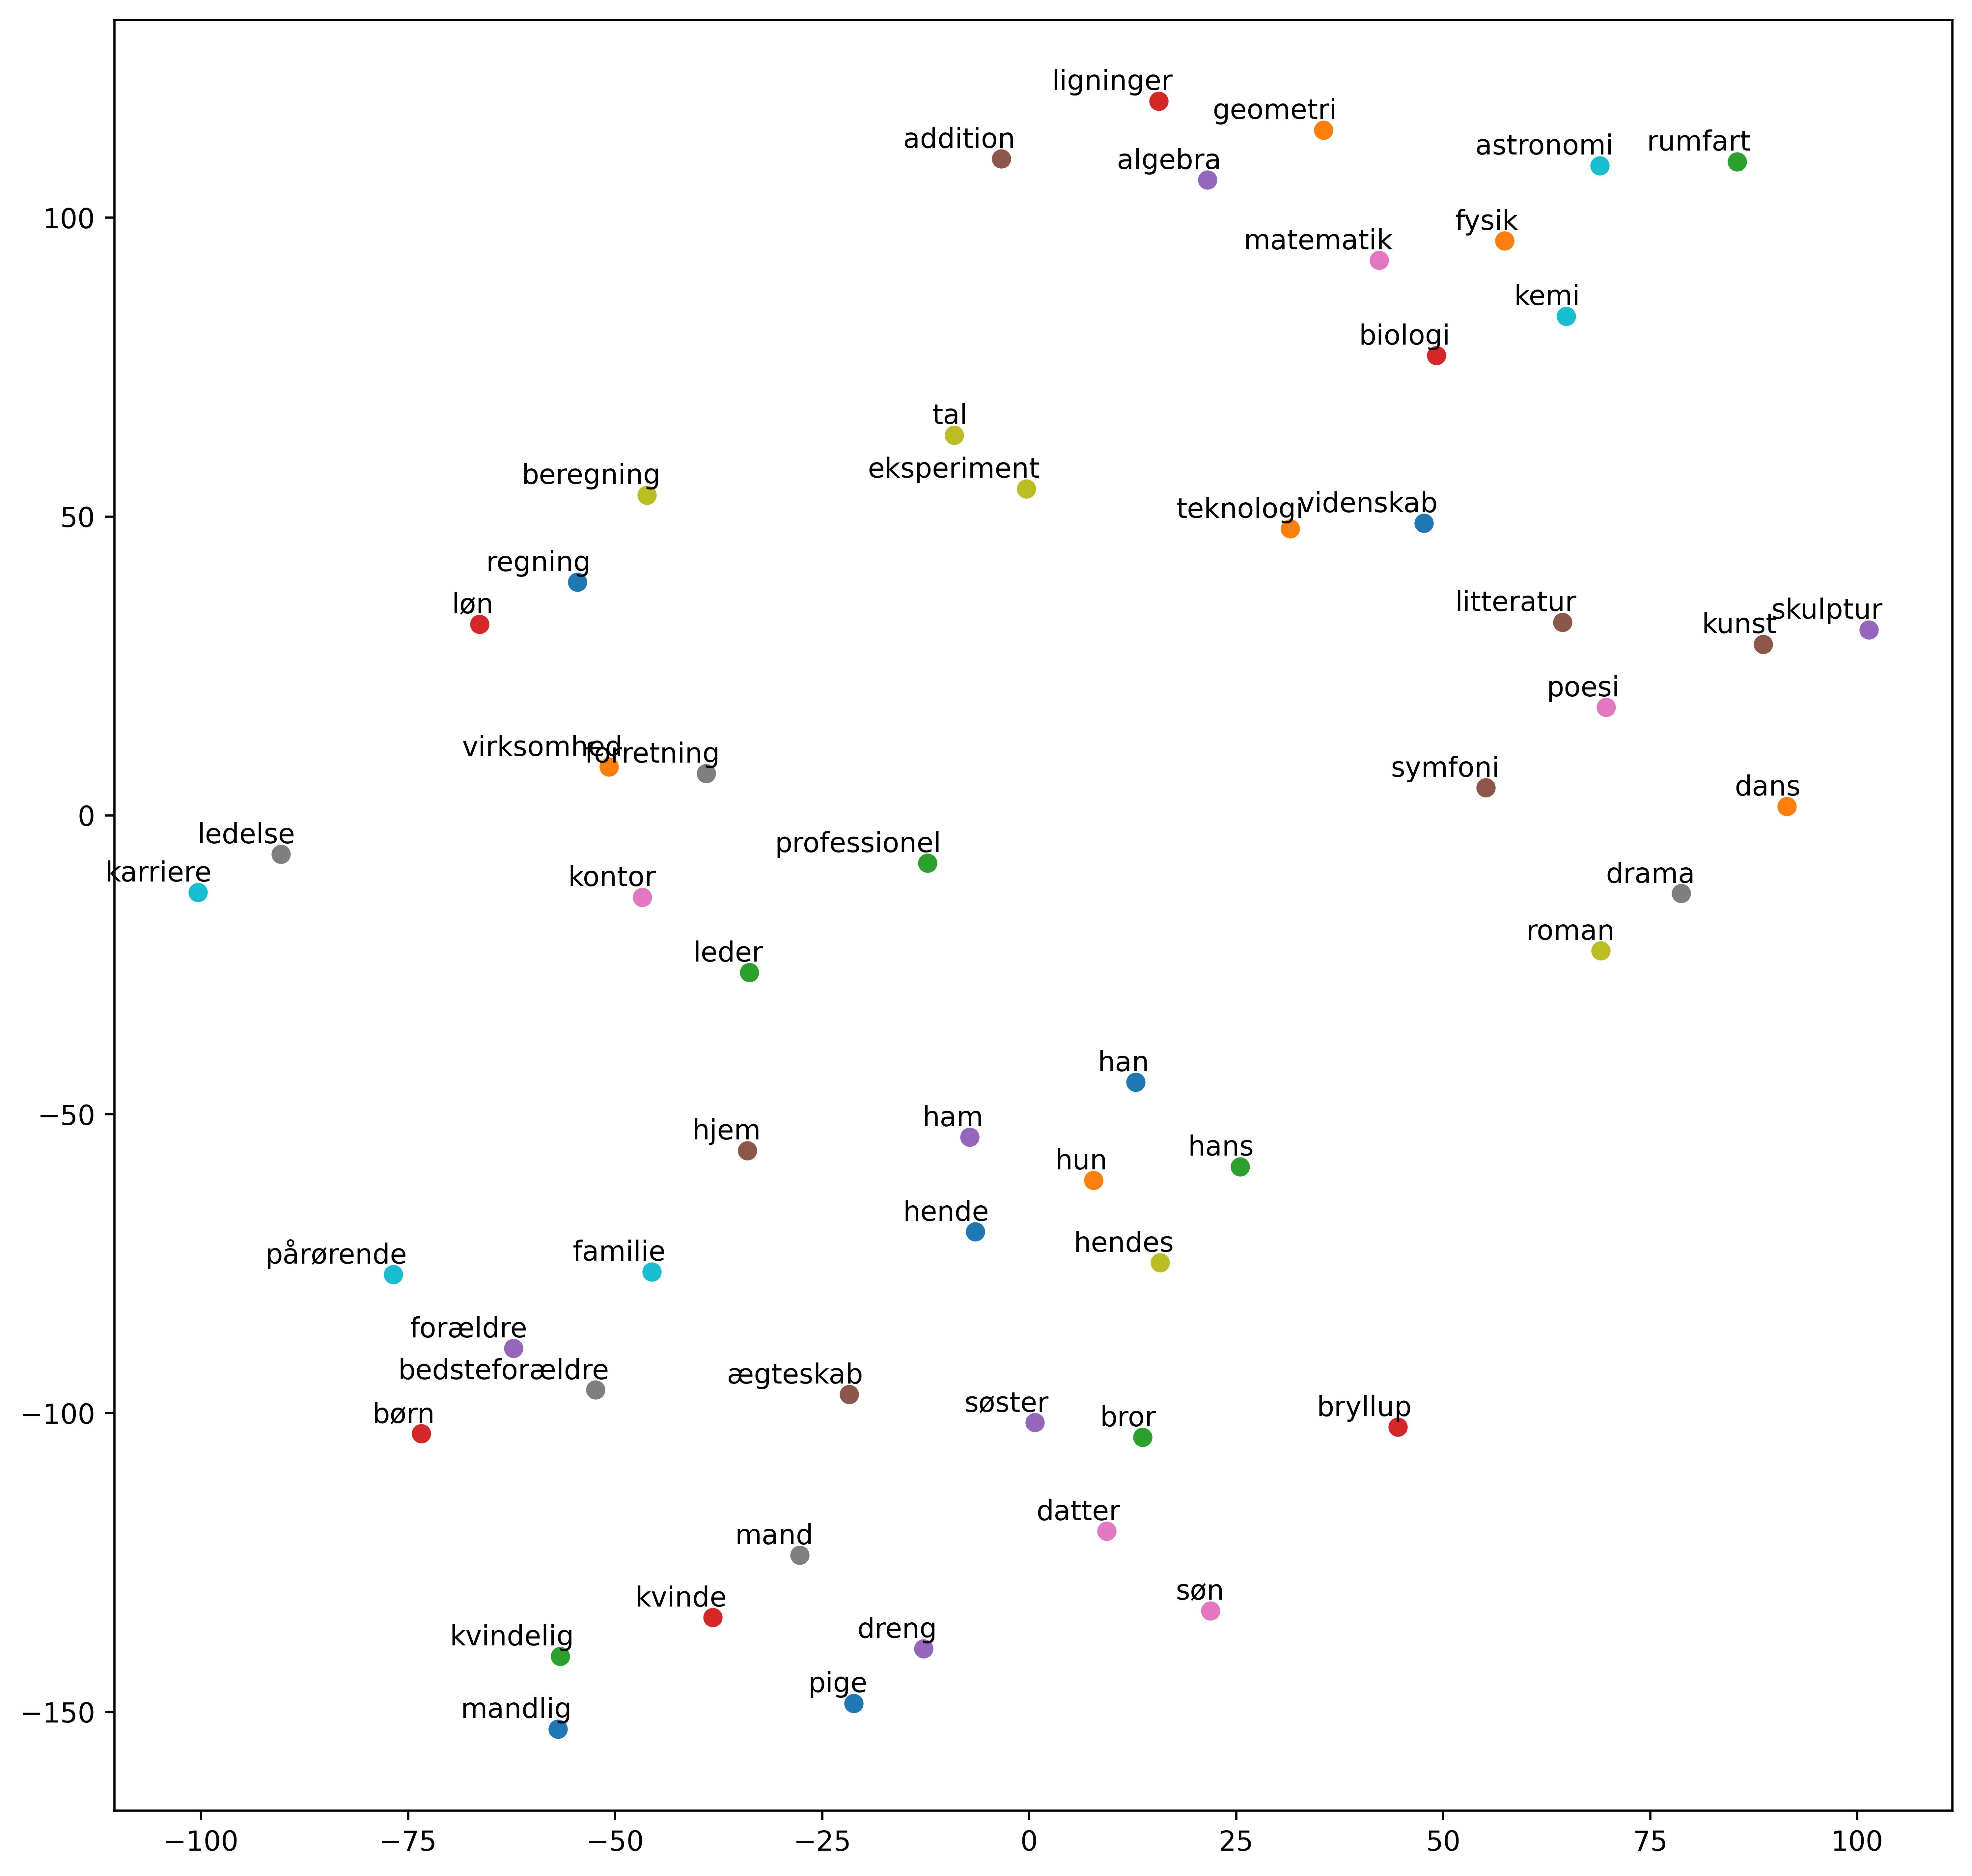

In [21]:
#Load word embeddings from daNLP
embeddings3 = load_wv_with_gensim('conll17.da.wv') #word2vec Skipgram CoNLL2017
#Test embeddings are loaded
embeddings3.most_similar("kvinde")
#Restrict embeddings
restrict_wv(embeddings3, restricted_word_set)
tsne_plot(embeddings3)

<ipython-input-16-cefb911590c1>:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  for word in model.wv.vocab:


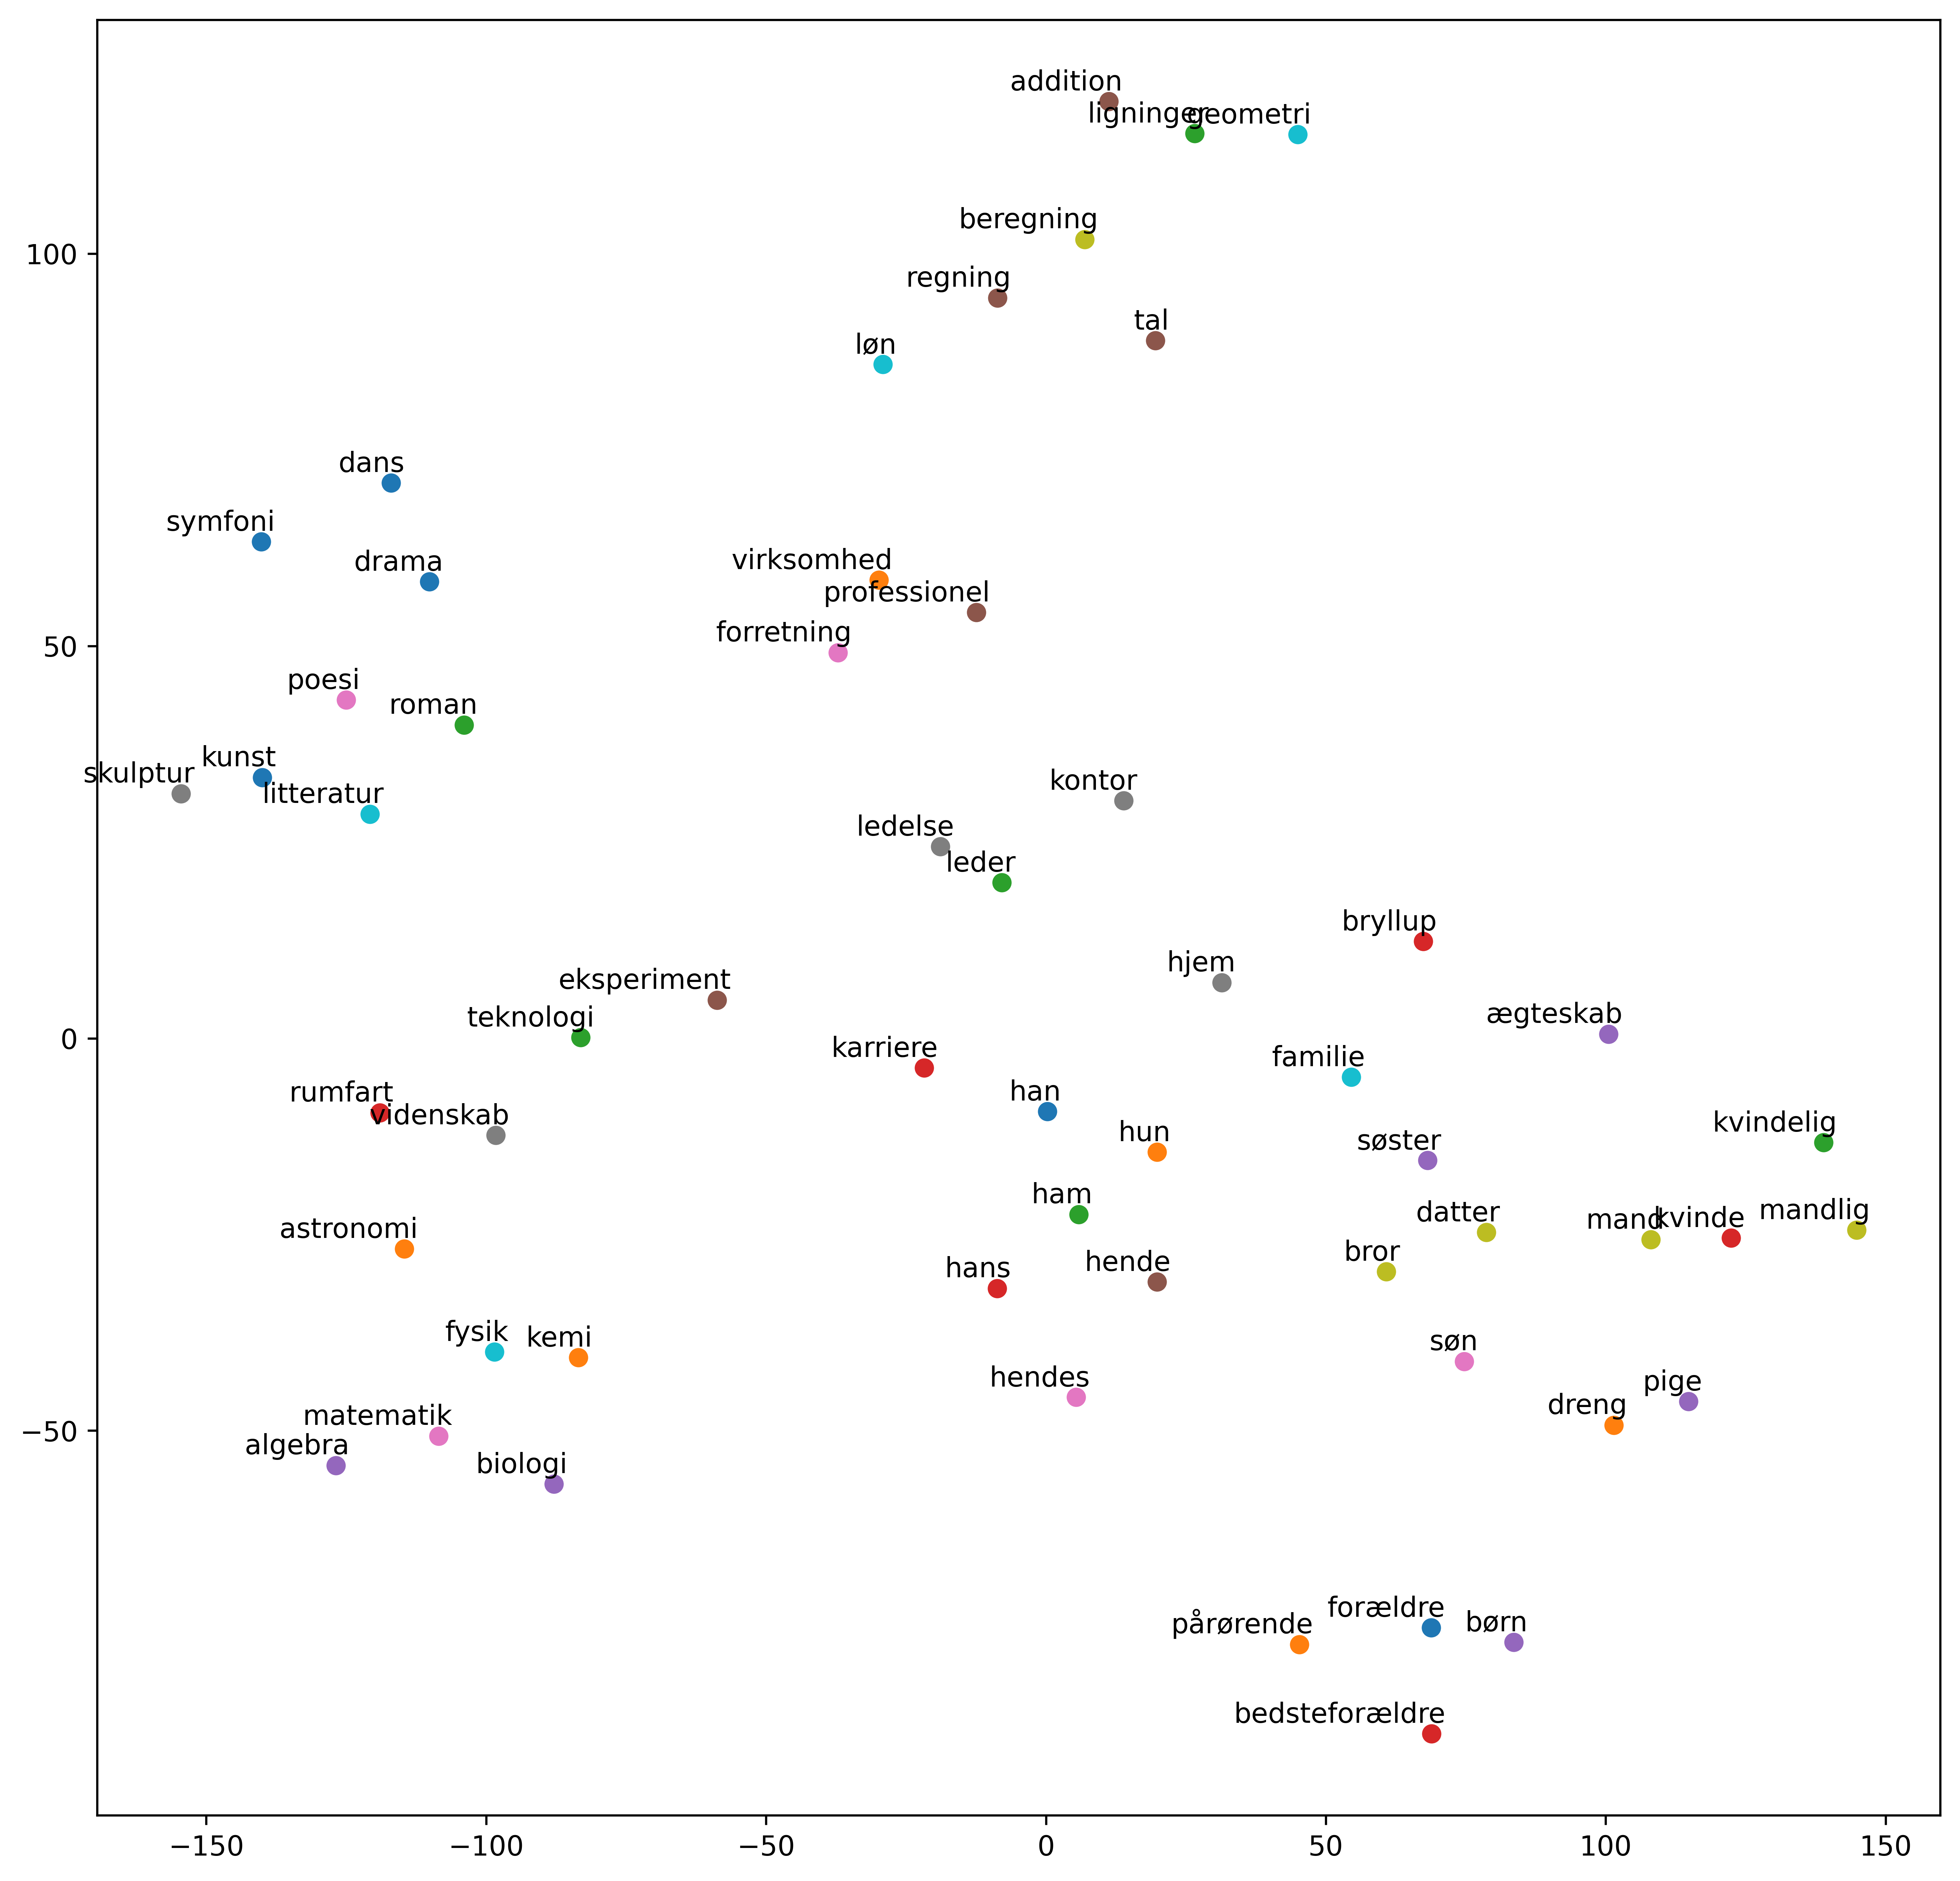

In [22]:
#Load word embeddings from daNLP
embeddings4 = gensim.models.fasttext.load_facebook_vectors('datenten14_5.bin')  
#Test embeddings are loaded
embeddings4.most_similar("kvinde")
#Restrict embeddings
restrict_wv(embeddings4, restricted_word_set)
tsne_plot(embeddings4)

<ipython-input-16-cefb911590c1>:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  for word in model.wv.vocab:


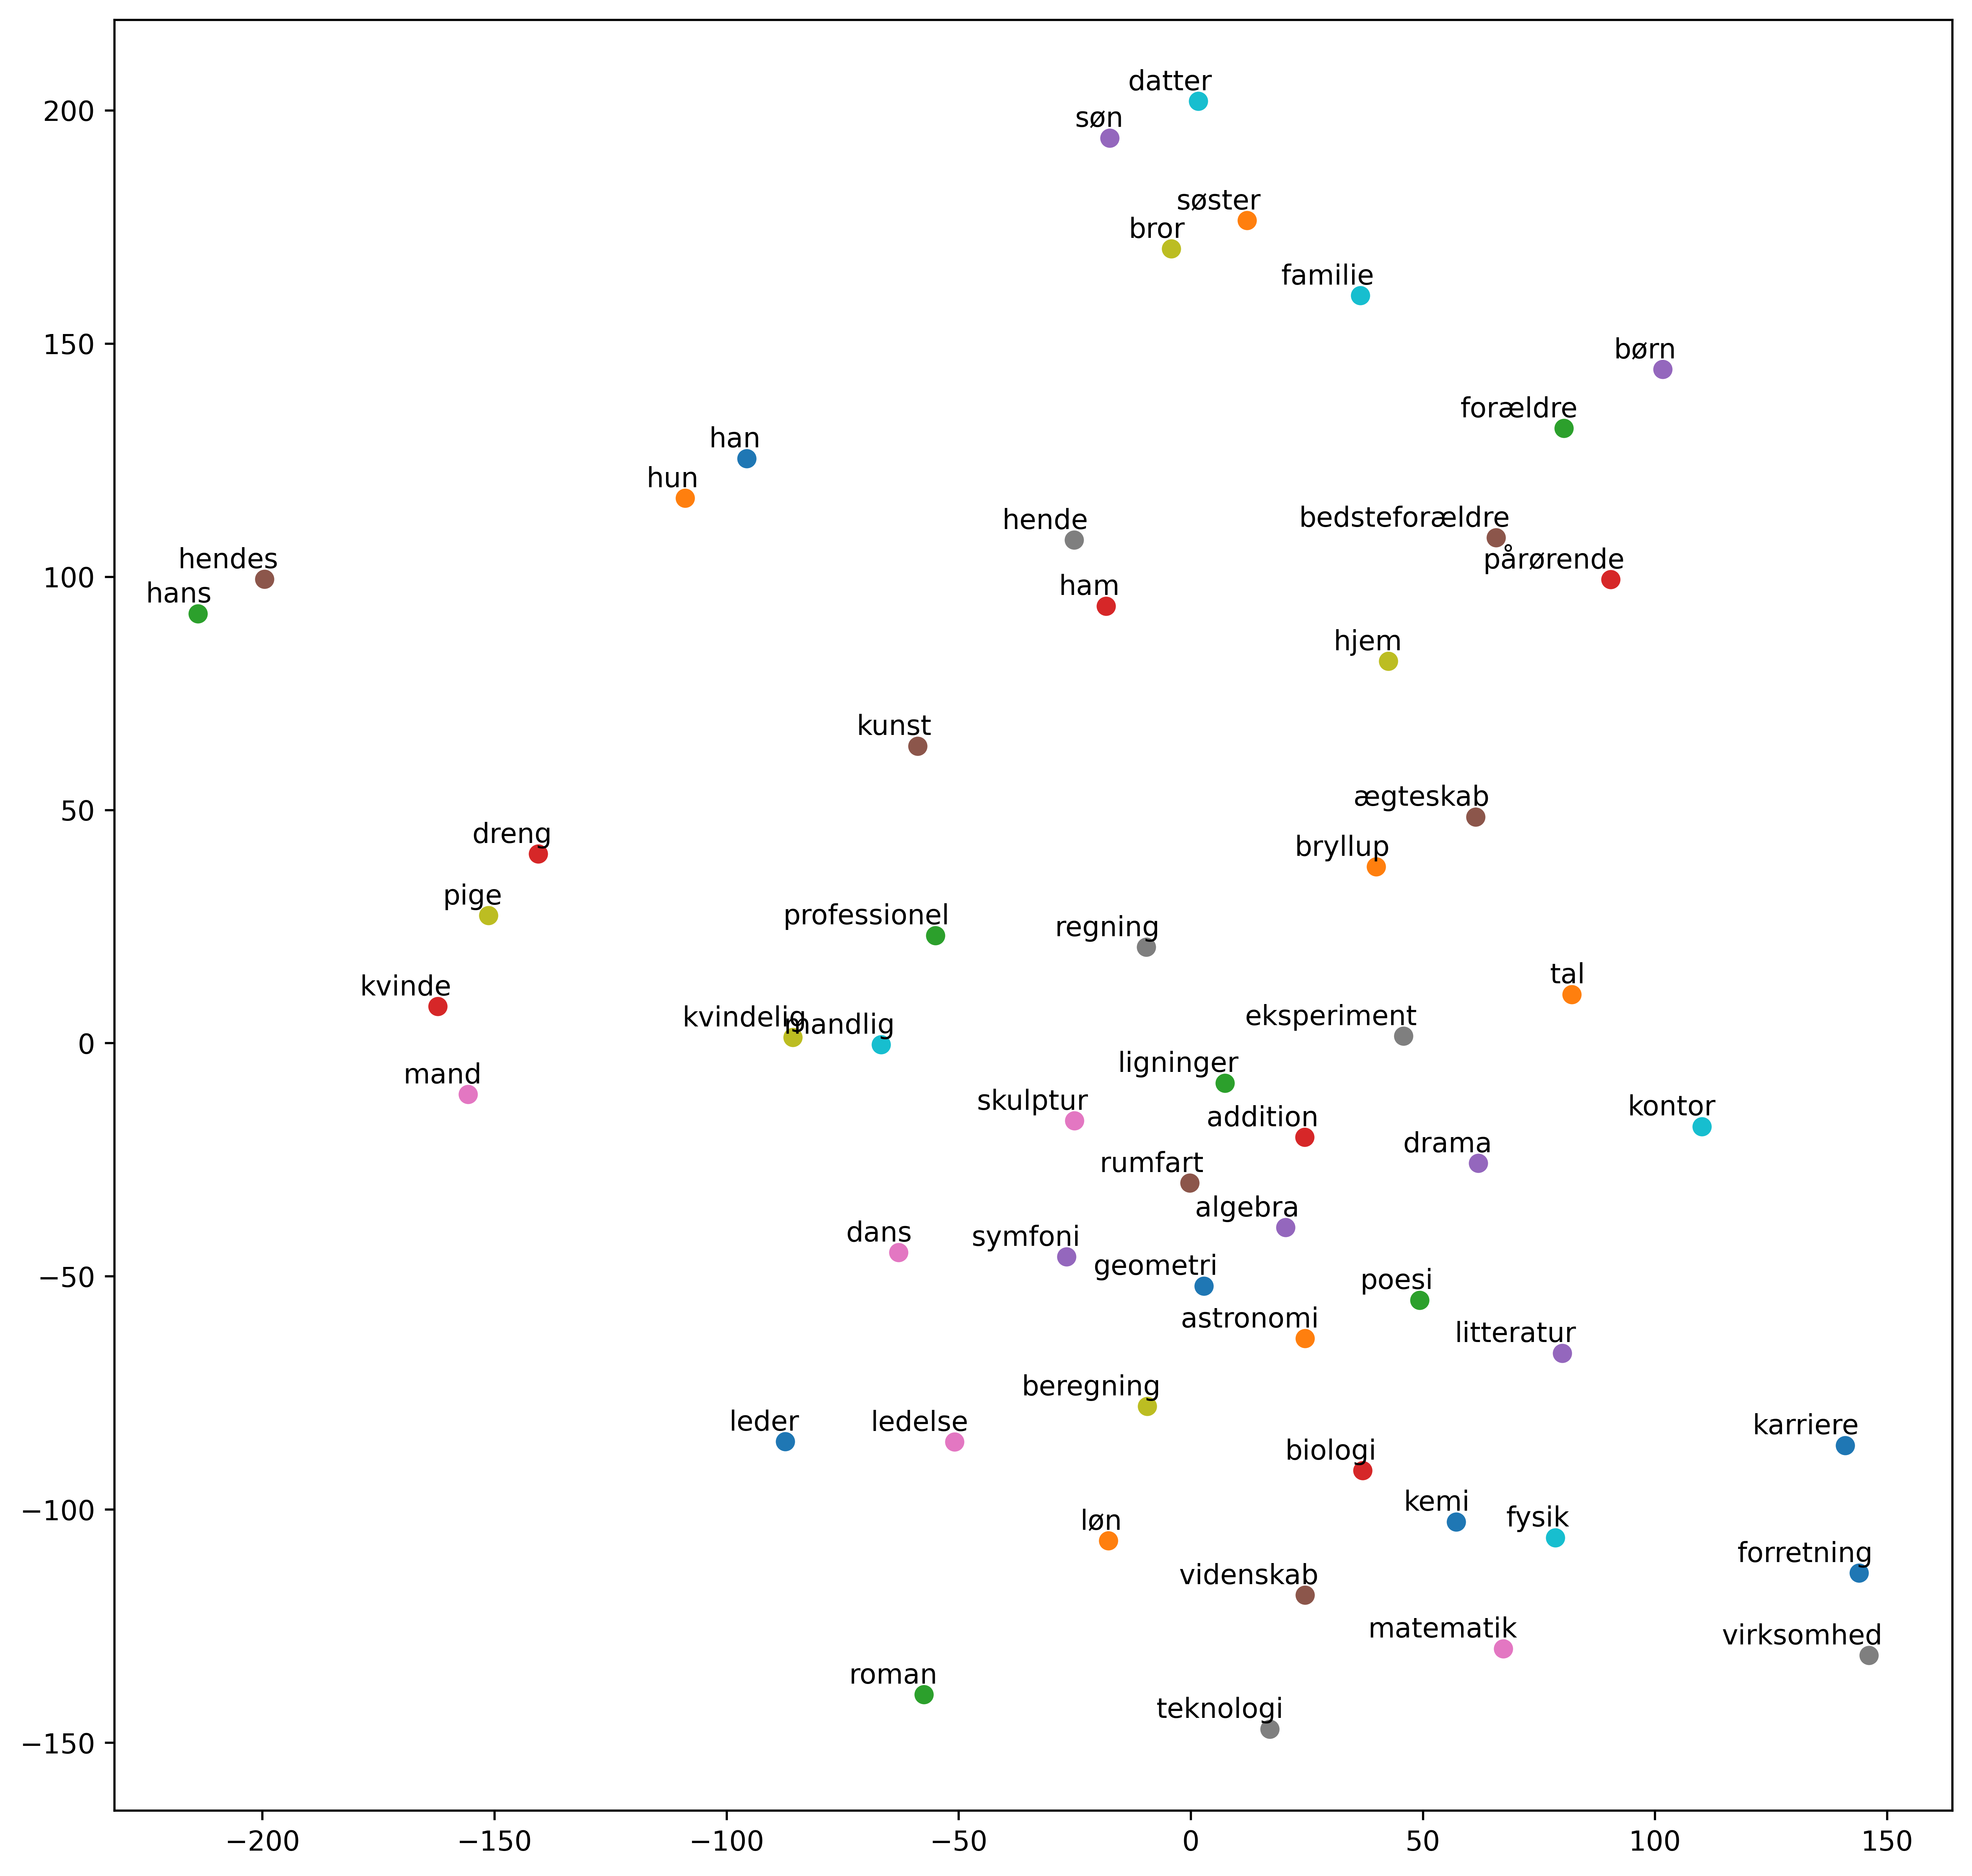

In [23]:
#Load word embeddings from daNLP
embeddings5 = load_wv_with_gensim('dslreddit.da.wv') #word2vec CBOW DSL Reddit
#Test embeddings are loaded
embeddings5.most_similar("kvinde")
#Restrict embeddings
restrict_wv(embeddings5, restricted_word_set)
tsne_plot(embeddings5)

<ipython-input-8-cefb911590c1>:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  for word in model.wv.vocab:


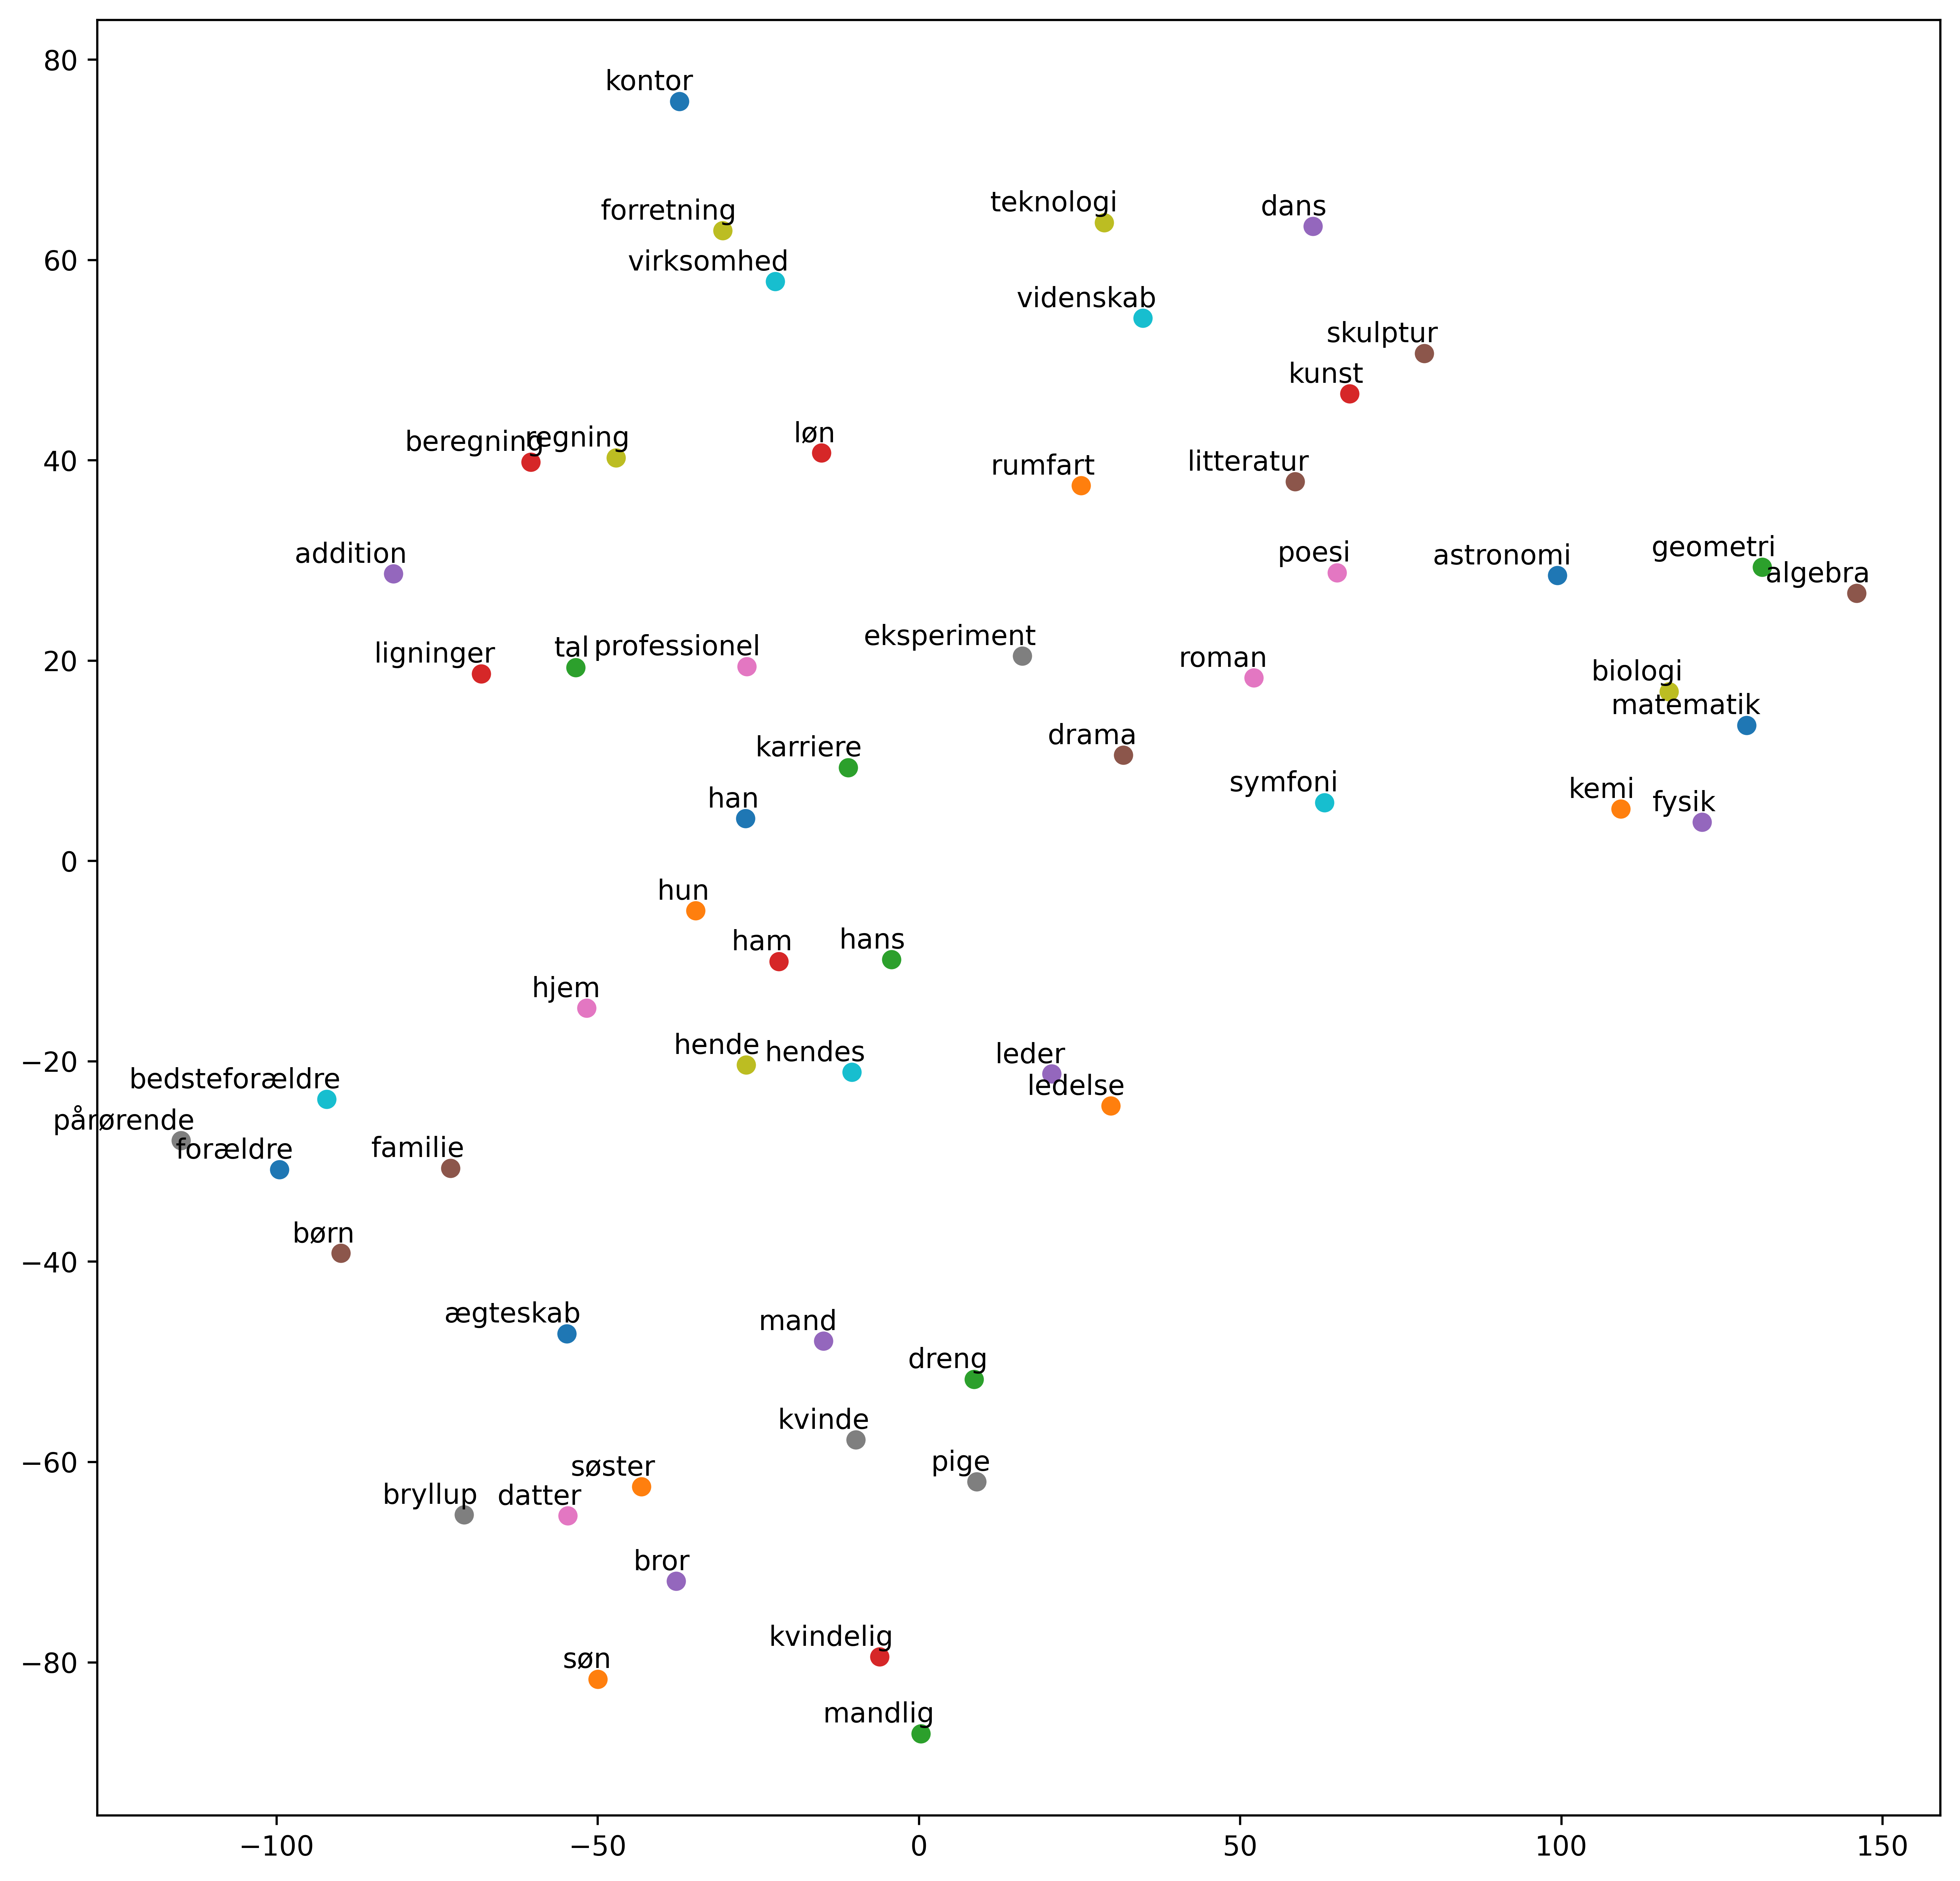

In [10]:
#Load word embeddings from daNLP
from gensim.models.keyedvectors import KeyedVectors
embeddings6 = KeyedVectors.load_word2vec_format('danish_newspapers_1880To2013.txt', binary=False) 
#Test embeddings are loaded
embeddings6.most_similar("kvinde")
#Restrict embeddings
restrict_wv(embeddings6, restricted_word_set)
tsne_plot(embeddings6)